In [16]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [17]:
#Aqui lemos os dados do nosso CSV base
df_base = pd.read_csv("votacao_secao_2020_SP.csv", sep=';', header=0, encoding = "ISO-8859-1")

In [18]:
#Separamos os dados do municipio de mongaguá
df_municipio = pd.DataFrame(df_base[df_base["NM_MUNICIPIO"] == "MONGAGUÁ"],columns=["NM_MUNICIPIO", "DS_CARGO", "NM_VOTAVEL", "QT_VOTOS", "NM_LOCAL_VOTACAO"])

#Separamos os dados somente da votação de vereadores
df_vereador = pd.DataFrame(df_municipio[df_municipio["DS_CARGO"] == "Vereador"],columns=["NM_MUNICIPIO", "NM_VOTAVEL", "QT_VOTOS", "NM_LOCAL_VOTACAO"])

#Separamos os dados somente da votação de prefeito
df_prefeito = pd.DataFrame(df_municipio[df_municipio["DS_CARGO"] == "Prefeito"],columns=["NM_MUNICIPIO", "NM_VOTAVEL", "QT_VOTOS", "NM_LOCAL_VOTACAO"])

In [19]:
#Salvamos os dados em csv
df_municipio.to_csv("municipio2020.csv")

#Salvamos os dados em csv
df_vereador.to_csv("vereador2020.csv")

#Salvamos os dados em csv
df_prefeito.to_csv("prefeito2020.csv")

In [20]:
#Agora que separamos nossa base de dados
#vamos trabalha-la
df_prefeito_2020 = pd.read_csv("prefeito2020.csv")
df_prefeito_2020.head()

,Unnamed: 0,NM_MUNICIPIO,NM_VOTAVEL,QT_VOTOS,NM_LOCAL_VOTACAO
0,3074,MONGAGUÁ,RENATO CARVALHO DONATO,28,EMEF. REGINA MARIA
1,3589,MONGAGUÁ,RENATO CARVALHO DONATO,24,EMEF. IVONE DE ALMEIDA MONTEIRO
2,4053,MONGAGUÁ,RENATO CARVALHO DONATO,36,EMEF SIRANA KOUKDJIAN
3,4111,MONGAGUÁ,RENATO CARVALHO DONATO,28,EE. PROF. ARACY DA SILVA FREITAS
4,4560,MONGAGUÁ,RENATO CARVALHO DONATO,24,EMEF. VERA CRUZ


In [21]:
#Area Loty ate Agenor
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EE. AGENOR DE CAMPOS"],"1.Loty até Agenor")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEF. BARIGUI"],"1.Loty até Agenor")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEF. JACOUB KOUKDJIAN"],"1.Loty até Agenor")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEF. REGINA MARIA"],"1.Loty até Agenor")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEF. FLÓRIDA MIRIM"],"1.Loty até Agenor")


In [22]:
#Area Jussara ate Itaoca
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEIEF. PEQUENO PRÍNCIPE"],"2.Jussara até Itaoca")


In [23]:
#Area Santa eugenia ate Seabra
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEF. HORTENCIA QUINTINO DE FARIA BOTELHO"],"3.Santa Eugenia até Seabra")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEF. PROF. PEDRO FERNANDES DANTE"],"3.Santa Eugenia até Seabra")


In [24]:
#Area Atlantica até Aguapeu
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEF. IVONE DE ALMEIDA MONTEIRO"],"4.Atlantica até Aguapeu")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEF. PREFEITO CASSIMIRO CORREA NETO"],"4.Atlantica até Aguapeu")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEF. VERA CRUZ"],"4.Atlantica até Aguapeu")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEIEF SÍTIO DO PICA PAU AMARELO"],"4.Atlantica até Aguapeu")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEIEF. PROF. CÉLIA PUPO DE JESUS"],"4.Atlantica até Aguapeu")


In [25]:
#Area Samoa ate a Divisa
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EE. PROF. AIDA LEDA BAUER DAVIES"],"5.Samoa até a Divisa")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EE. PROF. ARACY DA SILVA FREITAS"],"5.Samoa até a Divisa")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEF SIRANA KOUKDJIAN"],"5.Samoa até a Divisa")
df_prefeito_2020["NM_LOCAL_VOTACAO"] = df_prefeito_2020["NM_LOCAL_VOTACAO"].replace(["EMEF. TONICO SILVA"],"5.Samoa até a Divisa")


In [26]:
df_soma_por_região = df_prefeito_2020.groupby(["NM_LOCAL_VOTACAO","NM_VOTAVEL"])["QT_VOTOS"].sum()


In [27]:
df_soma_por_região.to_csv("somaregiao2020.csv")

In [28]:
df_soma_por_região = pd.read_csv("somaregiao2020.csv")

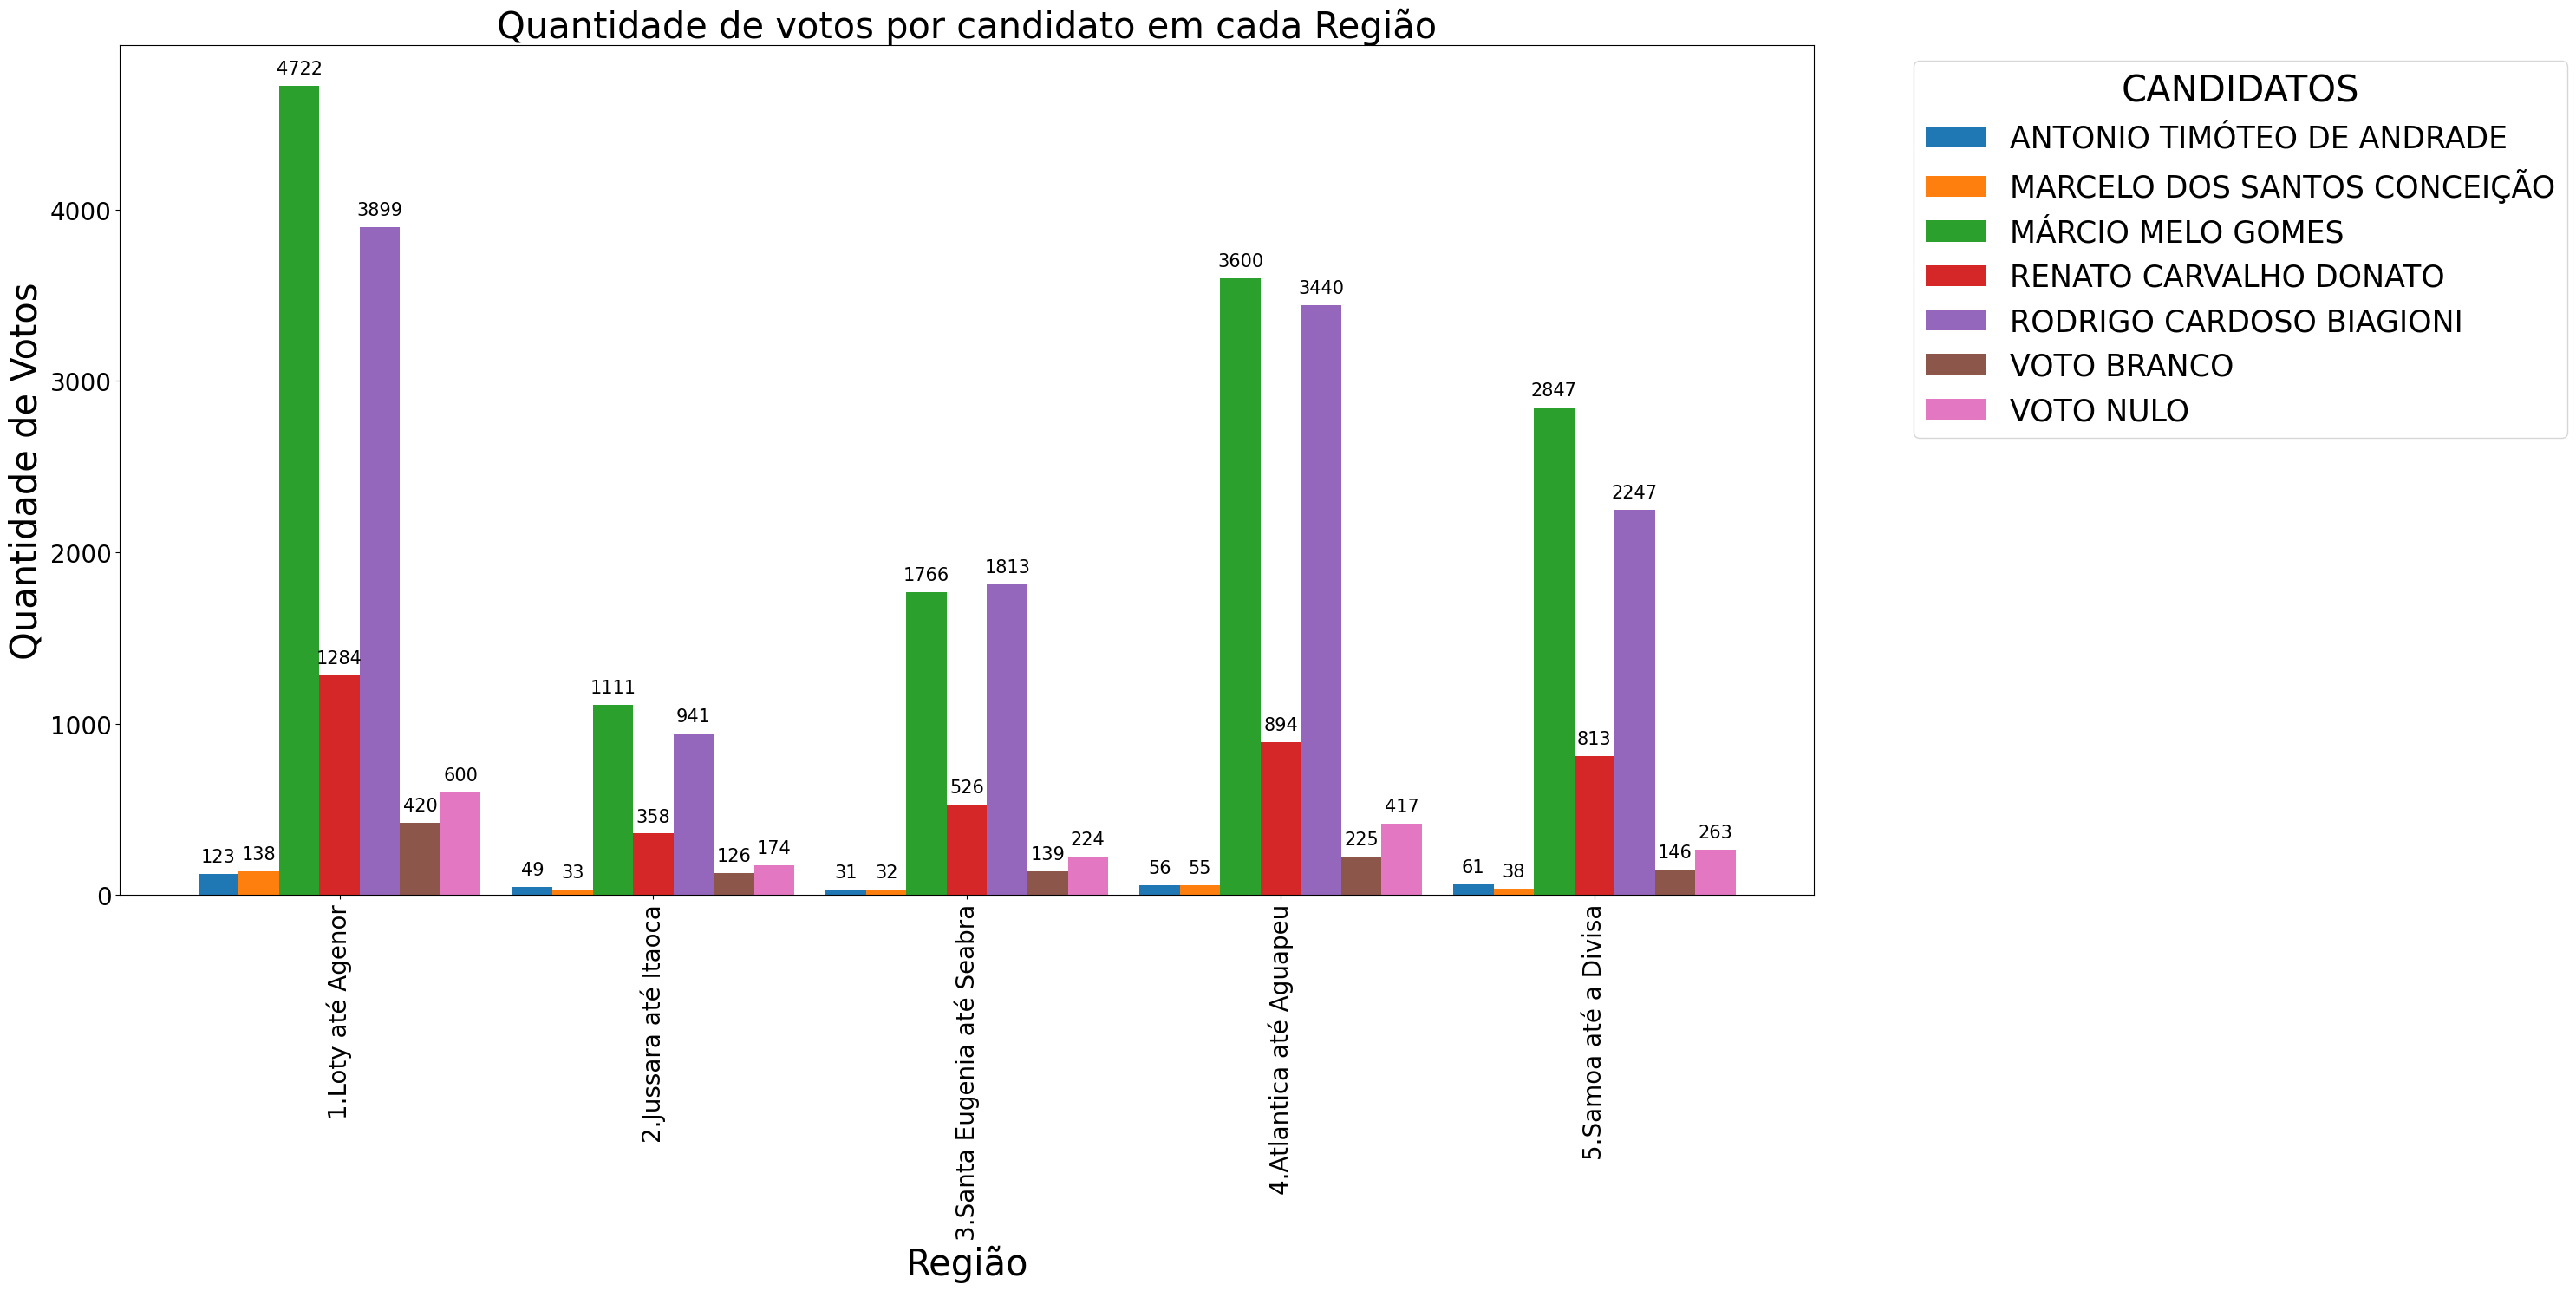

In [29]:
#CRIAÇÃO DO GRAFICO DE BARRAS
#QUANTIDADES DE VOTOS POR CANDIDATO EM CADA REGIÃO

# Agrupar os votos por local de votação e candidato
df_agrupado = df_soma_por_região.groupby(['NM_LOCAL_VOTACAO', 'NM_VOTAVEL'])['QT_VOTOS'].sum().unstack()

# Criar o gráfico de barras
ax = df_agrupado.plot(kind='bar',  figsize=(30, 15), width=0.9, fontsize=20)
for barra in ax.patches:
    altura = barra.get_height()
    if altura > 0:  # Se a altura for maior que zero, adiciona o valor
        ax.text(
            barra.get_x() + barra.get_width() /2,  # Posição horizontal
            barra.get_y() + altura + 50,             # Posição vertical
            f'{int(altura)}',                       # Texto (valor da altura)
            ha='center', va='bottom', fontsize=15, color='black'
        )

# Personalizar o gráfico
plt.title('Quantidade de votos por candidato em cada Região', fontsize=30)
plt.xlabel('Região', fontsize=30)
plt.ylabel('Quantidade de Votos', fontsize=30)
plt.legend(title='CANDIDATOS',title_fontsize='30', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=25)
plt.tight_layout()

#Salva o grafico em um arquivo png
plt.savefig("Desempenho_de_cad_candidato_por_região.png")
# Exibir o gráfico
plt.show()


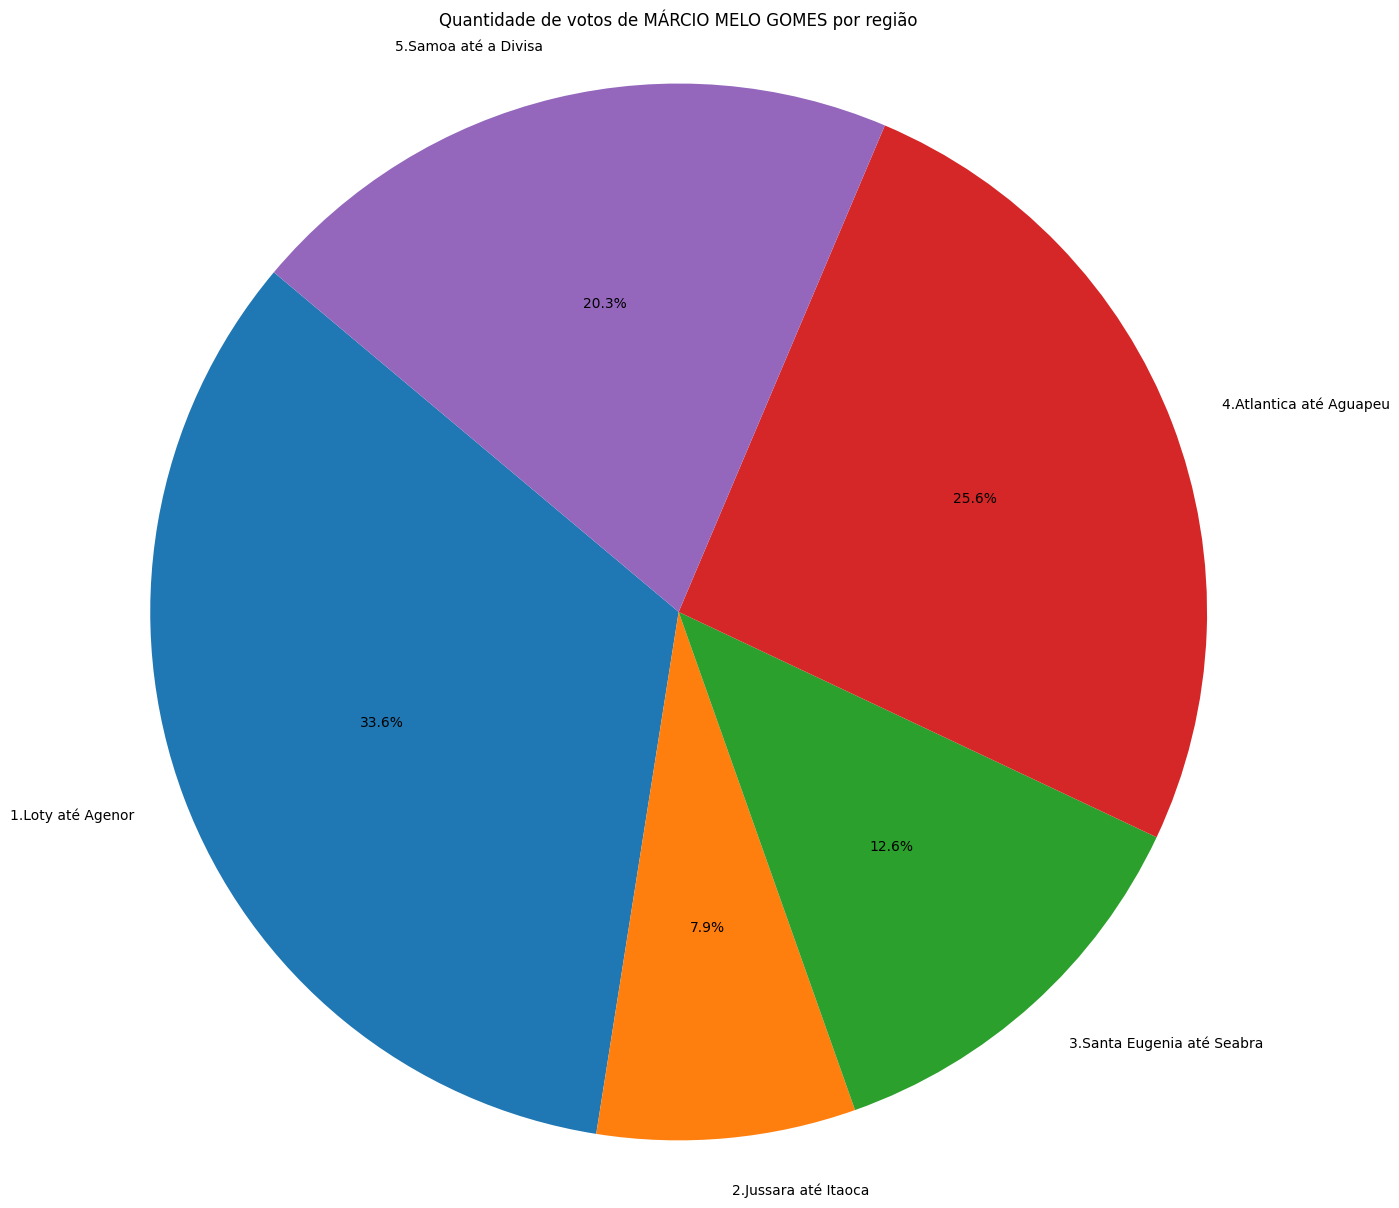

In [30]:
#CRIAÇÃO DO GRAFICO DE PIZZA
#QUANTIDADE DE VOTOS DO CANDIDATO POR REGIÃO


candidato = 'MÁRCIO MELO GOMES'
df_filtrado = df_soma_por_região[df_soma_por_região['NM_VOTAVEL'] == candidato]

# Agrupar os votos por região
df_agrupado = df_filtrado.groupby('NM_LOCAL_VOTACAO')['QT_VOTOS'].sum()

# Criar o gráfico de pizza
plt.figure(figsize=(15, 15))
plt.pie(df_agrupado, labels=df_agrupado.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Quantidade de votos de {candidato} por região')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo

#Salva o grafico em um arquivo png
plt.savefig("Soma_de_votos_por_região_MARCIO_MELO_GOMES.png")
# Exibir o gráfico
plt.show()

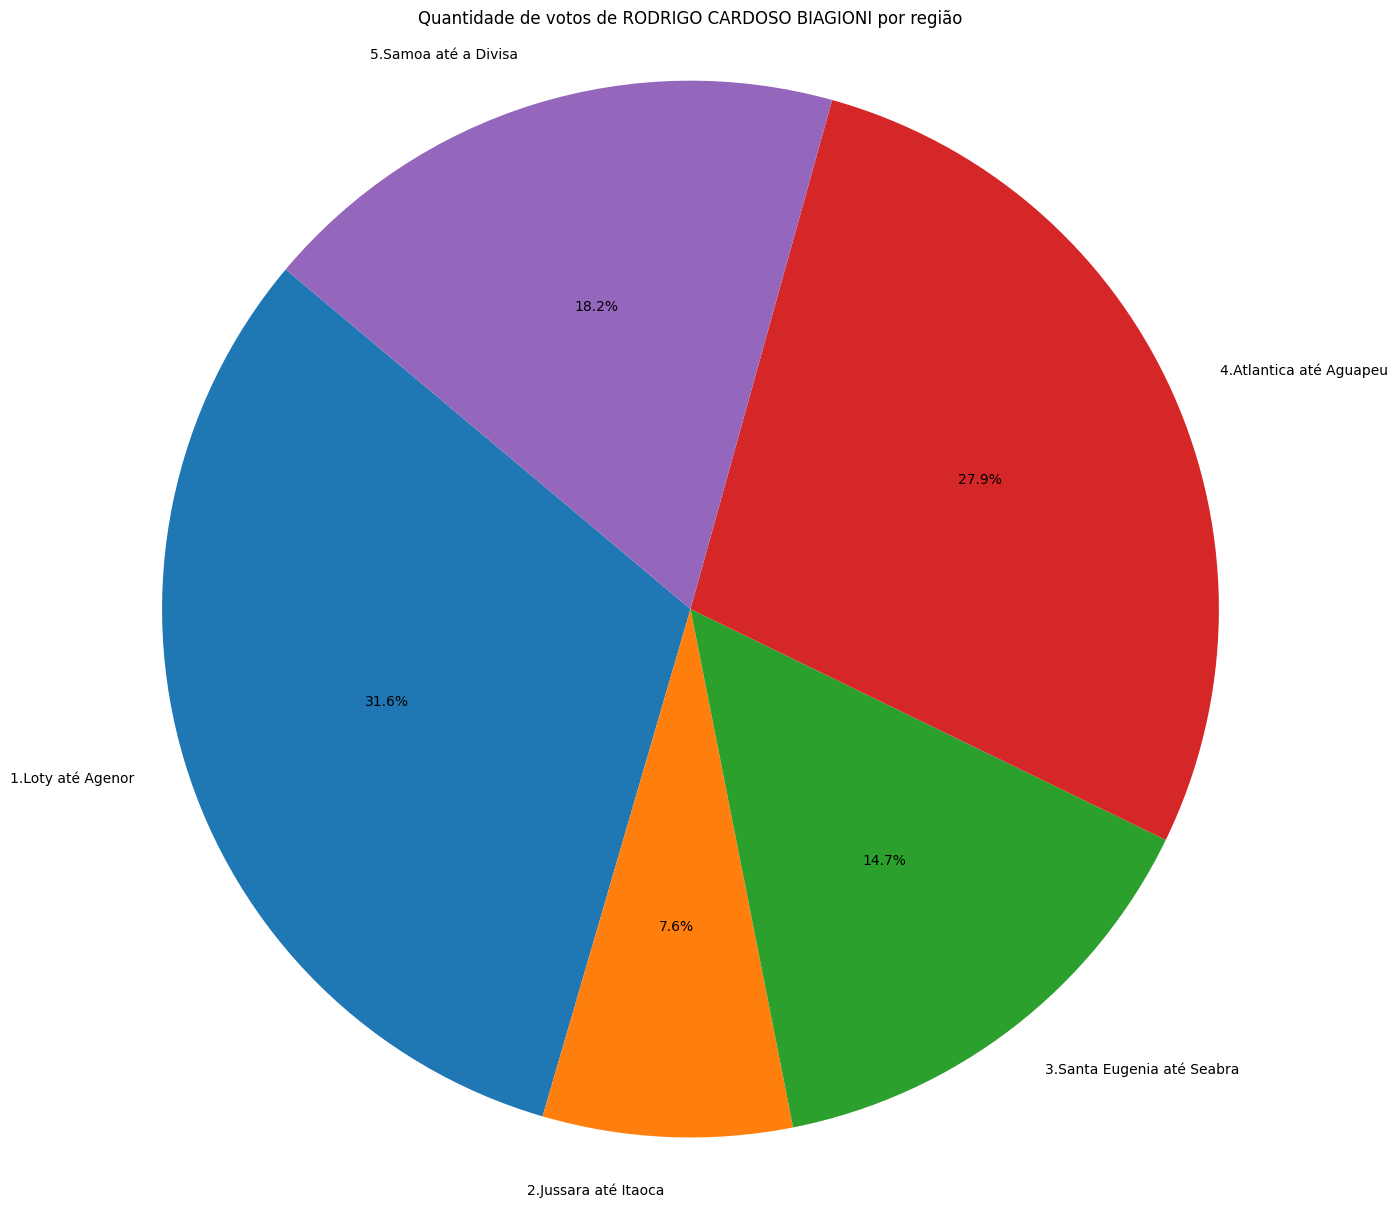

In [31]:
#CRIAÇÃO DO GRAFICO DE PIZZA
#QUANTIDADE DE VOTOS DO CANDIDATO POR REGIÃO


candidato = 'RODRIGO CARDOSO BIAGIONI'
df_filtrado = df_soma_por_região[df_soma_por_região['NM_VOTAVEL'] == candidato]

# Agrupar os votos por região
df_agrupado = df_filtrado.groupby('NM_LOCAL_VOTACAO')['QT_VOTOS'].sum()

# Criar o gráfico de pizza
plt.figure(figsize=(15, 15))
plt.pie(df_agrupado, labels=df_agrupado.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Quantidade de votos de {candidato} por região')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo

#Salva o grafico em um arquivo png
plt.savefig("Soma_de_votos_por_região_RODRIGO_CARDOSO_BIAGIONI.png")
# Exibir o gráfico
plt.show()